## Домашнее задание №2

1) Импортируйте пандас как pd и считайте файл TSLA.csv (https://www.kaggle.com/efekurdoglu/teslastockprice/data) как датафрейм

In [10]:
import pandas as pd
df = pd.read_csv('C:/Users/Asus/Downloads/TSLA.csv');

2) Вывести все колонки из DataFrame

In [11]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2572,2020-09-16,439.869995,457.790009,435.309998,441.760010,441.760010,72279300
2573,2020-09-17,415.600006,437.790009,408.000000,423.429993,423.429993,76779200
2574,2020-09-18,447.940002,451.000000,428.799988,442.149994,442.149994,86406800
2575,2020-09-21,453.130005,455.679993,407.070007,449.390015,449.390015,109476800


3) Посчитать среднюю цену закрытия акций Tesla, в периуд с открытия по 10.01.2012

In [46]:
df.index=df.Date
df[['Date', 'Close']]
df[df['Date']<'2012-01-10']['Close']

Date
2010-06-29    4.778
2010-06-30    4.766
2010-07-01    4.392
2010-07-02    3.840
2010-07-06    3.222
              ...  
2012-01-03    5.616
2012-01-04    5.542
2012-01-05    5.424
2012-01-06    5.382
2012-01-09    5.450
Name: Close, Length: 387, dtype: float64

In [48]:
df[df['Date']<'2012-01-10']['Close'].mean()

5.129875968992248

4) Вывести график цены закрытия

In [44]:
import matplotlib.pyplot as plt

In [49]:
df.index = range(len(df))

<AxesSubplot:>

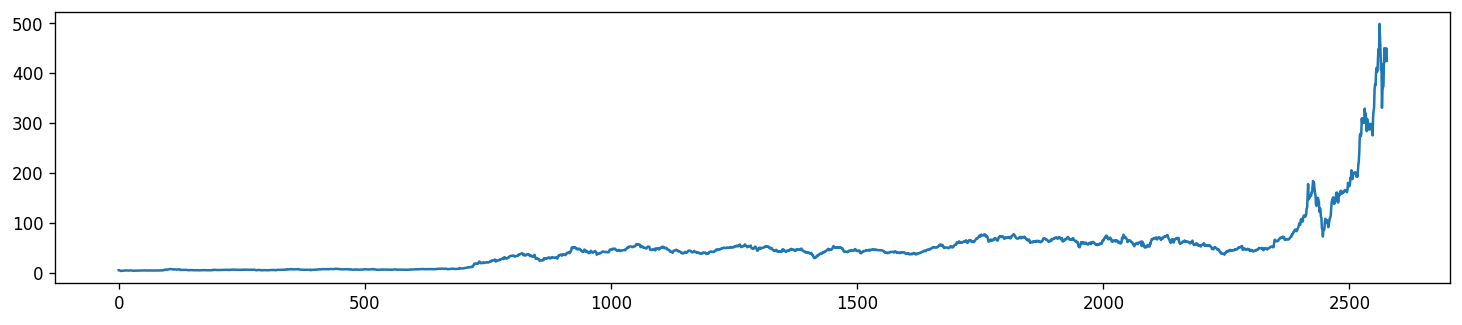

In [116]:
from matplotlib.pyplot import figure
figure(figsize=(15, 3), dpi=120)
df['Close'].plot()

5) Нормализация

In [117]:
df['Open']

0         3.800000
1         5.158000
2         5.000000
3         4.600000
4         4.000000
           ...    
2572    439.869995
2573    415.600006
2574    447.940002
2575    453.130005
2576    429.600006
Name: Open, Length: 2577, dtype: float64

In [118]:
max(df.Open)

502.140015

In [119]:
min(df.Open)

3.228

In [120]:
df['Open'].apply(lambda x: ((x-min(df.Open))/(max(df.Open)-min(df.Open))))

0       0.001146
1       0.003868
2       0.003552
3       0.002750
4       0.001547
          ...   
2572    0.875188
2573    0.826543
2574    0.891364
2575    0.901766
2576    0.854604
Name: Open, Length: 2577, dtype: float64

6) Что такое SMA (Simple Moving Average) с окном 12,15,30. Можно посмотреть внешние решения:

https://www.pythonpool.com/moving-average-python/

https://mrjbq7.github.io/ta-lib/

Построить график с ценой закрытия и посчитаным SMA 12,15,30

In [121]:
import numpy as np

In [138]:
df.index = range(len(df))

df['pandas_SMA_3']=df['Close'].rolling(window=3).mean()
df.pandas_SMA_3

0              NaN
1              NaN
2         4.645333
3         4.332667
4         3.818000
           ...    
2572    437.046672
2573    438.316671
2574    435.779999
2575    438.323334
2576    438.590007
Name: pandas_SMA_3, Length: 2577, dtype: float64

<AxesSubplot:>

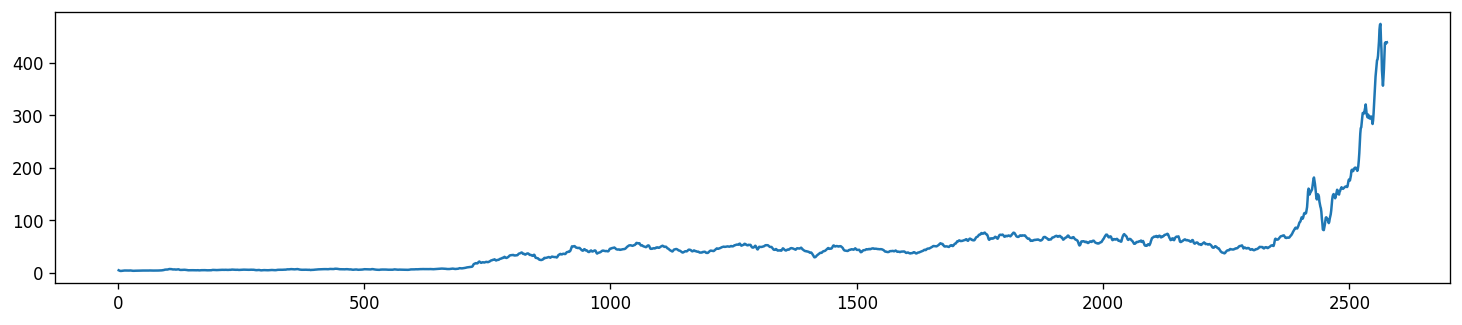

In [135]:
from matplotlib.pyplot import figure
figure(figsize=(15, 3), dpi=120)
df['pandas_SMA_3'].plot()

In [136]:
df.pandas_SMA_12

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2572    414.492500
2573    412.075002
2574    407.558334
2575    405.403335
2576    407.267502
Name: pandas_SMA_12, Length: 2577, dtype: float64

<AxesSubplot:ylabel='Цена закрытия'>

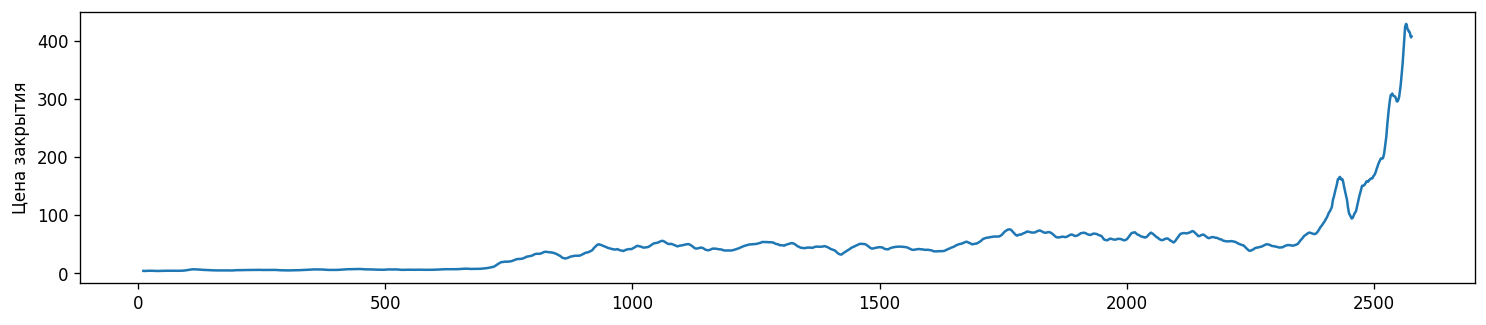

In [159]:
figure(figsize=(15, 3), dpi=120)
plt.ylabel('Цена закрытия')
df['pandas_SMA_12'].plot()

In [139]:
df['pandas_SMA_15']=df['Close'].rolling(window=15).mean()
df.pandas_SMA_15

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2572    421.254266
2573    420.773999
2574    420.400665
2575    420.848000
2576    415.908667
Name: pandas_SMA_15, Length: 2577, dtype: float64

<AxesSubplot:ylabel='Цена закрытия'>

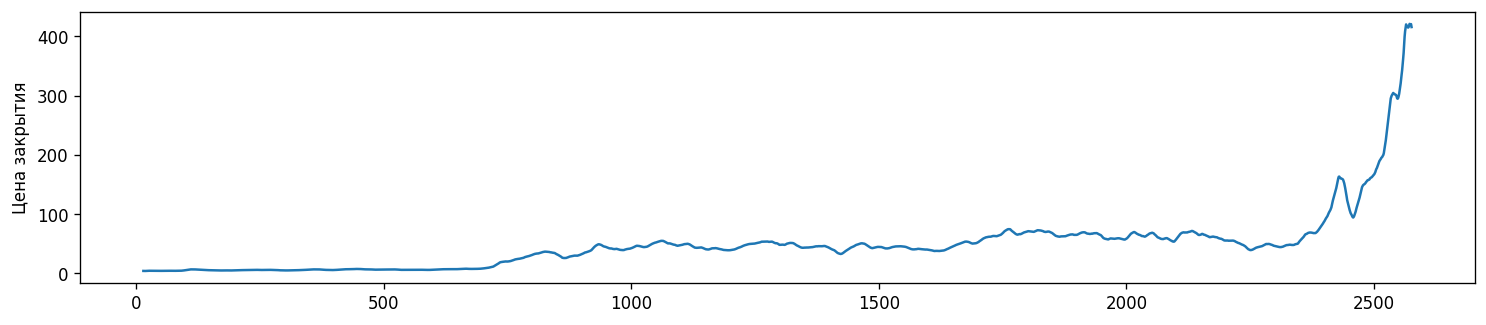

In [160]:
figure(figsize=(15, 3), dpi=120)
plt.ylabel('Цена закрытия')
df['pandas_SMA_15'].plot()

In [141]:
df['pandas_SMA_30']=df['Close'].rolling(window=30).mean()
df.pandas_SMA_30

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2572    382.209464
2573    386.423664
2574    391.231465
2575    396.526399
2576    401.210266
Name: pandas_SMA_30, Length: 2577, dtype: float64

<AxesSubplot:ylabel='Цена закрытия'>

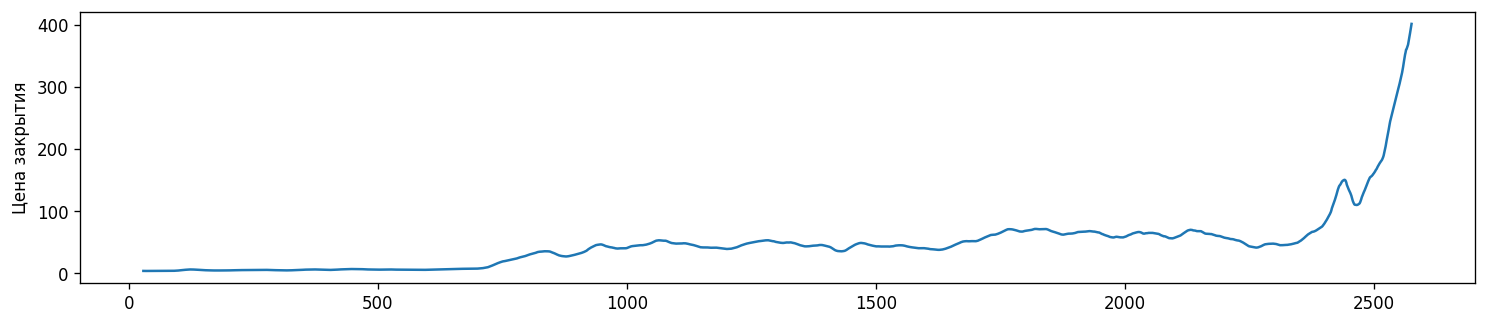

In [161]:
figure(figsize=(15, 3), dpi=120)
plt.ylabel('Цена закрытия')
df['pandas_SMA_30'].plot()

<Figure size 1800x360 with 0 Axes>

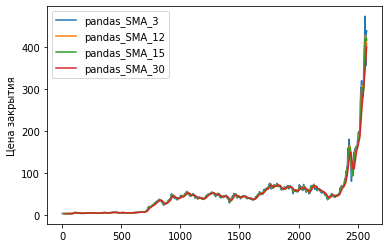

<Figure size 1800x360 with 0 Axes>

In [167]:
df[['pandas_SMA_3', 'pandas_SMA_12','pandas_SMA_15', 'pandas_SMA_30']].plot()
plt.ylabel('Цена закрытия')

In [153]:
gf=df[['Close','pandas_SMA_3','pandas_SMA_12','pandas_SMA_15','pandas_SMA_30']]

In [169]:
gf

,Close,pandas_SMA_3,pandas_SMA_12,pandas_SMA_15,pandas_SMA_30
0,4.778000,NaN,NaN,NaN,NaN
1,4.766000,NaN,NaN,NaN,NaN
2,4.392000,4.645333,NaN,NaN,NaN
3,3.840000,4.332667,NaN,NaN,NaN
4,3.222000,3.818000,NaN,NaN,NaN
...,...,...,...,...,...
2572,441.760010,437.046672,414.492500,421.254266,382.209464
2573,423.429993,438.316671,412.075002,420.773999,386.423664
2574,442.149994,435.779999,407.558334,420.400665,391.231465
2575,449.390015,438.323334,405.403335,420.848000,396.526399


Я не знаю, какой вывод можно сделать по этим графикам, поэтому оставлю только графики.